<a href="https://colab.research.google.com/github/Tahmina-cloud/AI-Projects/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install transformers
!pip install torch
!pip install Pillow

# Step 1: Imports
from transformers import pipeline
from PIL import Image
import io
from google.colab import files
import matplotlib.pyplot as plt

In [12]:
# Step 4: Load models
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")
text_generator = pipeline("text-generation", model="gpt2")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_to

Saving pexels-senanur-ulusoy-182138396-15924270.jpg to pexels-senanur-ulusoy-182138396-15924270 (9).jpg


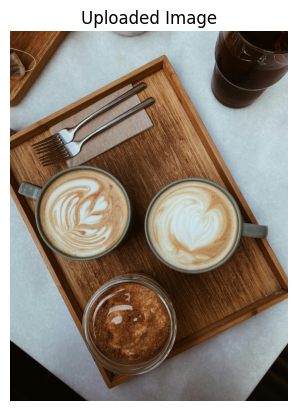

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



a tray with a cup of coffee and a spoon 

🖼️ Description (Normal Paragraph):

Describe the following text a tray with a cup of coffee and a spoon The other was filled, with a single spoon. It did this in spite of it becoming clear that my mouth could not move for three hours. As the coffee became too late to finish its delicious drinkings, it was very much as the spoon-feeding tray was doing. I knew exactly which spoon had finished its beverage. This was the first time, after so long being served at so little of

🎨 Poem:

"a tray with a cup of coffee and a spoon "
"bristles "
"cries "
"dings "
"dents "
"dunes "
"eyes "
"eleven "


In [16]:


# Step 2: Upload Image
uploaded = files.upload()

for filename in uploaded.keys():
    image_path = filename

# Step 3: Display the uploaded image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()


# Step 5: Generate short caption from image
description = image_to_text(image_path)[0]['generated_text']

# Step 6: Expand description into normal paragraph (single line, multiple sentences)
expansion_prompt = f"""Describe the following text
\"{description}\""""

expanded_description = text_generator(
    expansion_prompt,
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=2.9,
    top_p=.5
)

paragraph_text = expanded_description[0]['generated_text']
paragraph_text = paragraph_text.replace('\n', ' ').replace('"', '').strip()

#paragraph_text = paragraph_text.replace('\n', ' ').replace('"', '').strip()

# Step 7: Create poetry prompt
poetry_prompt = f"Write a poem on following text \n\"{description}\""

poetry_output = text_generator(
    poetry_prompt,
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=0.95,
    top_p=0.9
)

# Step 8: Process the poem (skip first and last lines)
full_poem = poetry_output[0]['generated_text']
poem_lines = [line.strip() for line in full_poem.strip().split('\n') if line.strip()]

final_poem = poem_lines[1:-1]

# Step 9: Display everything nicely
print("\n" + "="*60)
print(description)
print("\n" + "="*60)
print("🖼️ Description (Normal Paragraph):\n")
print(paragraph_text)
print("\n" + "="*60)
print("🎨 Poem:\n")
for line in final_poem:
    print(line)
print("="*60)
